In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/spam.csv', encoding='cp1252')

In [2]:
df=pd.DataFrame(data)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Data Cleaning
#EDA
#Text Preprocessing
#Model-Building
#Evaluation
#Improvement
#Website 
#Deploy 


# Data Cleaning

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Drop last three columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
df.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df=df.rename(columns={'v1':'target','v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
count=df['target'].value_counts()
count

target
0    4825
1     747
Name: count, dtype: int64

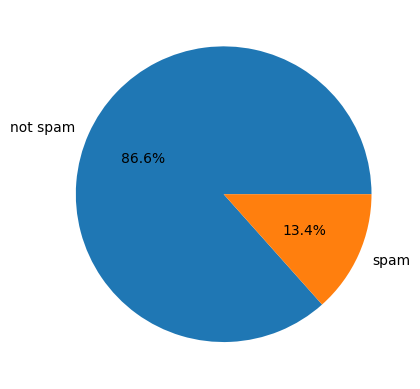

In [13]:
import matplotlib.pyplot as plt
plt.pie(count,labels=['not spam','spam'],autopct='%1.1f%%')
plt.show()

In [14]:
#data is unbalanced

In [15]:
import nltk

In [16]:
df['num_characters']=df['text'].apply(len)
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [17]:
#num of words
df['num_word']=(df['text'].apply(lambda x: nltk.word_tokenize(x))).apply(len)

In [18]:
#num of sentences
df['num_sent']=df['text'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)

In [19]:
df.head()

,target,text,num_characters,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df.describe()

,target,num_characters,num_word,num_sent
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
#not spam
df[df['target']==0][['num_characters','num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#spam
df[df['target']==1][['num_characters','num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


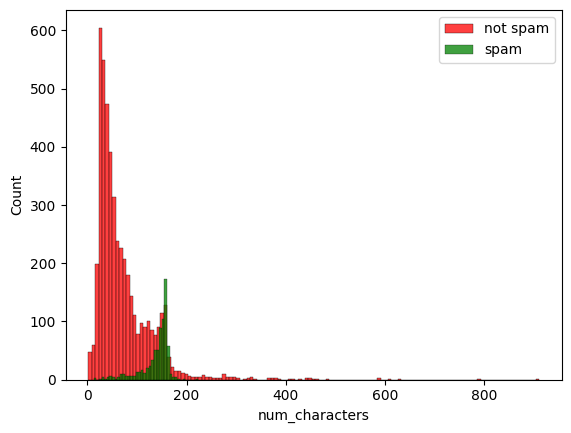

In [23]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'],color='r',label='not spam')
sns.histplot(df[df['target']==1]['num_characters'],color='green',label='spam')
plt.legend()
plt.show()

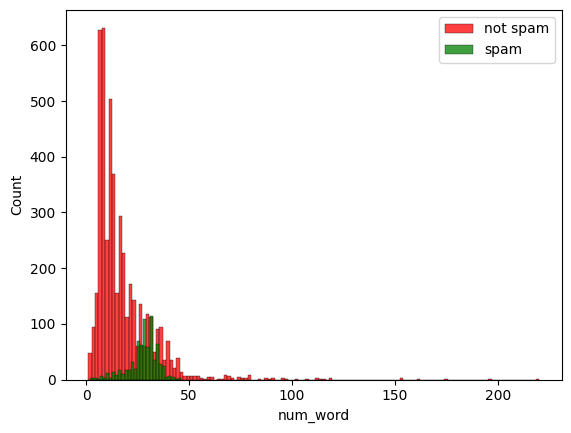

In [24]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_word'],color='r',label='not spam')
sns.histplot(df[df['target']==1]['num_word'],color='green',label='spam')
plt.legend()
plt.show()

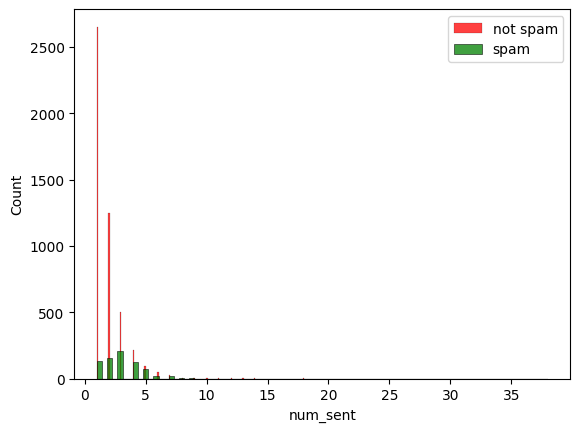

In [25]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_sent'],color='r',label='not spam')
sns.histplot(df[df['target']==1]['num_sent'],color='green',label='spam')
plt.legend()
plt.show()

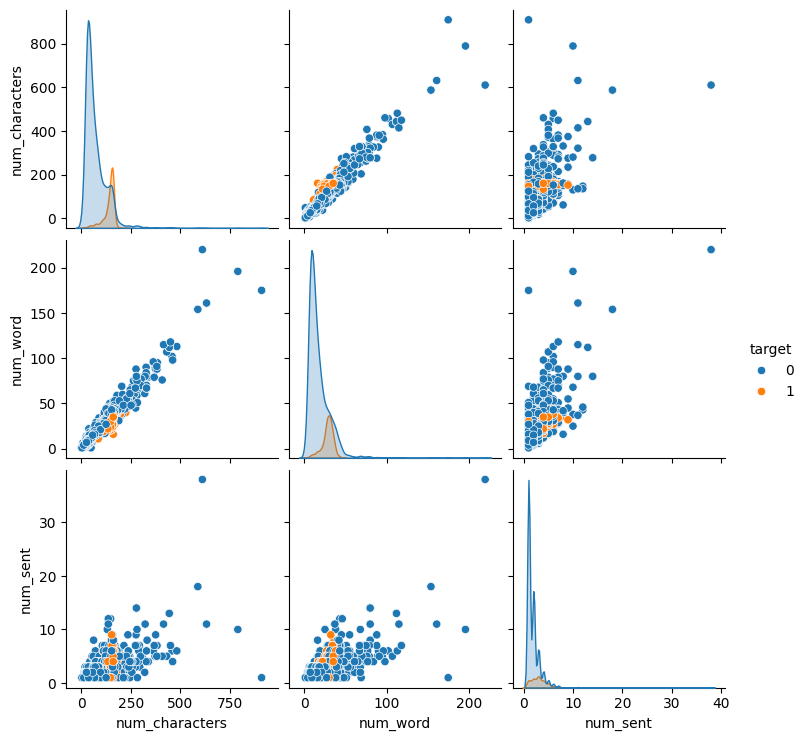

In [26]:
sns.pairplot(df,hue='target')

<Axes: >

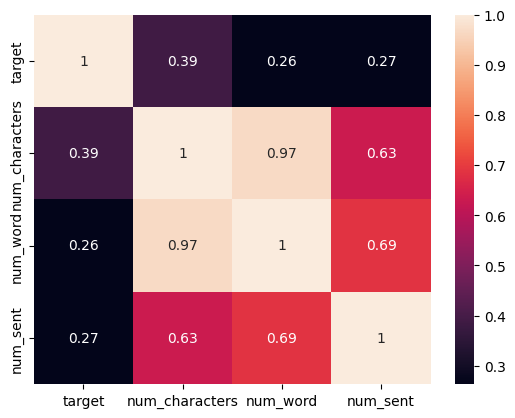

In [95]:
sns.heatmap(df[['target','num_characters','num_word','num_sent']].corr(),annot=True)

In [27]:
#Data-preprocessing
#lowercase
#tokenization
#removing special characters
#removing stop words and punctuation
#stemming

In [28]:
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        ps=PorterStemmer() 
        y.append(ps.stem(i))
        
    return " ".join(y)
    
    

In [29]:
df['transformed_text']=df[ 'text'].apply(transform_text)
df.head()

,target,text,num_characters,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

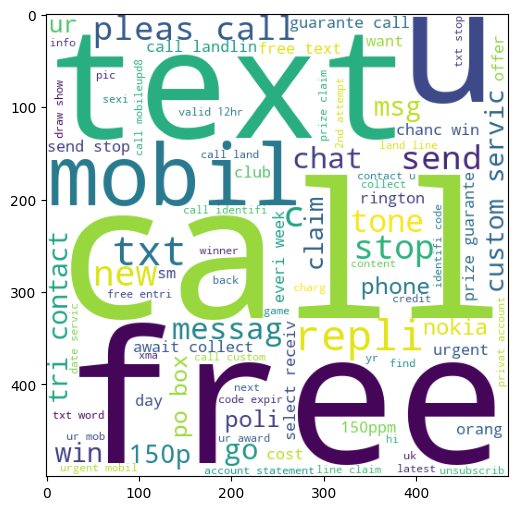

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [33]:
not_spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

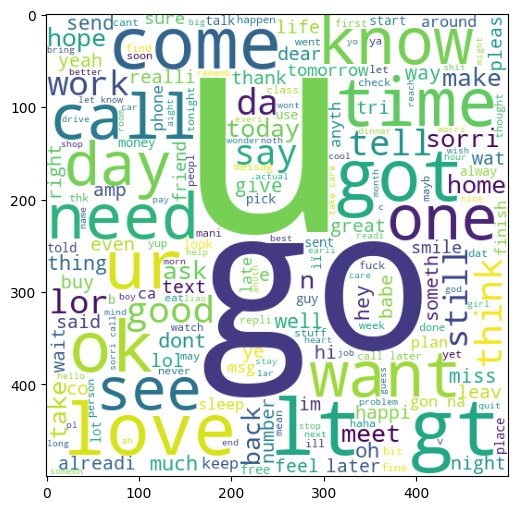

In [34]:
plt.figure(figsize=(15,6))
plt.imshow(not_spam_wc)

In [35]:
df.head()

,target,text,num_characters,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist(): 
    for word in msg.split():
        spam_corpus.append(word)

In [37]:
len(spam_corpus)

11490

C:\Users\User\AppData\Local\Temp\ipykernel_16984\772272987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=0,y=1,data=newdf,palette=palette)


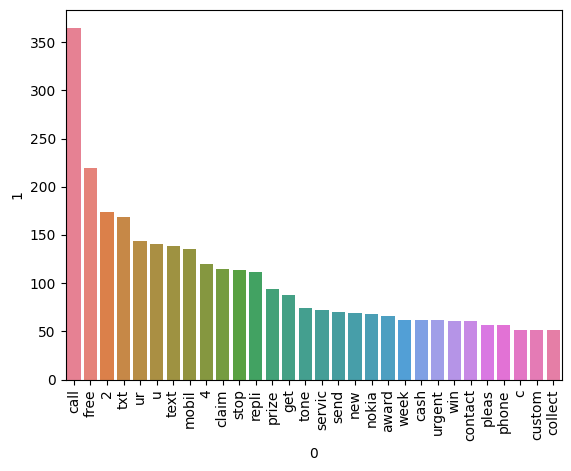

In [38]:
from collections import Counter
newdf=pd.DataFrame(Counter(spam_corpus).most_common(30))
palette = sns.color_palette("husl", len(newdf))
sns.barplot(x=0,y=1,data=newdf,palette=palette)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
not_spam_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist(): 
    for word in msg.split():
        not_spam_corpus.append(word)

In [40]:
len(not_spam_corpus)

38221

C:\Users\User\AppData\Local\Temp\ipykernel_16984\1706780111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=0,y=1,data=newdf,palette=palette)


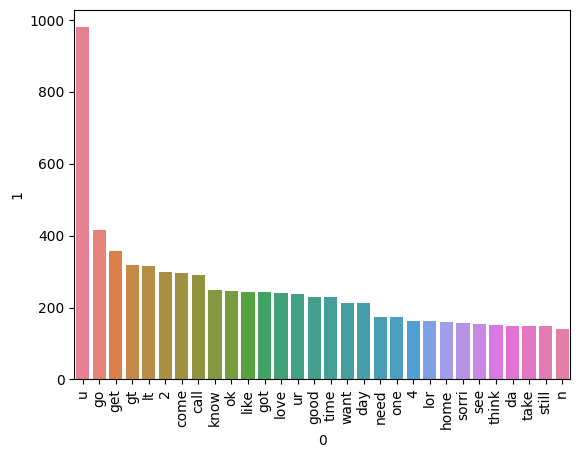

In [41]:
from collections import Counter
newdf=pd.DataFrame(Counter(not_spam_corpus).most_common(30))
palette = sns.color_palette("husl", len(newdf))
sns.barplot(x=0,y=1,data=newdf,palette=palette)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
#Model building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [44]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
df2=pd.DataFrame(X) 
df2['target']=pd.DataFrame(df['target'])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [46]:
df2['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [47]:
#data unbalanced 
#balance the data
from sklearn.utils import resample
df_majority=df2[df2['target']==0]
df_minority=df2[df2['target']==1]
#upsampling
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
df_minority_upsample.shape

(4825, 3001)

In [48]:
df=pd.concat([df_majority,df_minority_upsample])
df['target'].value_counts()

target
0    4825
1    4825
Name: count, dtype: int64

In [49]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,target
4246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.184512,0.0,0.0,1
3499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
4235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [52]:
df.duplicated()

0       False
1       False
3       False
4       False
6       False
        ...  
4246     True
3673     True
3618     True
3499     True
4235     True
Length: 9650, dtype: bool

In [53]:
X=df.drop('target',axis=1)
y=df['target']

In [54]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
y

0       0
1       0
3       0
4       0
6       0
       ..
4246    1
3673    1
3618    1
3499    1
4235    1
Name: target, Length: 9650, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# Define your models
models = {
    'LogisticRegression:':LogisticRegression(),
    'SVC:':SVC(),
    'KNeighborsClassifier:':KNeighborsClassifier(),
    'DecisionTreeClassifier:':DecisionTreeClassifier(),
    'GradientBoostingClassifier:':GradientBoostingClassifier(),
    'AdaBoostClassifier:':AdaBoostClassifier(),
    'GaussianNB:':GaussianNB(),
    'MultinomialNB:':MultinomialNB(),
    'BernoulliNB:':BernoulliNB(),
    'BaggingClassifier:':BaggingClassifier(),
    'ExtraTreesClassifier:':ExtraTreesClassifier(),
    'XGBClassifier:':XGBClassifier()
    
}
model_name=[]
accuracy=[]
precision=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(name)
    acc = accuracy_score(y_test, y_pred)*100
    cm = confusion_matrix(y_test, y_pred)
    ps = precision_score(y_test, y_pred, average='weighted')*100
    model_name.append(name)
    accuracy.append(acc)
    precision.append(ps)
    
    print('accuracy_score:', acc)
    print('confusion_matrix:', cm)
    print('precision_score:', ps)
    print('-'*40)

LogisticRegression:
accuracy_score: 98.54922279792746
confusion_matrix: [[974  11]
 [ 17 928]]
precision_score: 98.55091392731073
----------------------------------------
SVC:
accuracy_score: 99.63730569948187
confusion_matrix: [[983   2]
 [  5 940]]
precision_score: 99.6377623191442
----------------------------------------
KNeighborsClassifier:
accuracy_score: 68.13471502590673
confusion_matrix: [[370 615]
 [  0 945]]
precision_score: 80.69699083300118
----------------------------------------
DecisionTreeClassifier:
accuracy_score: 97.72020725388602
confusion_matrix: [[943  42]
 [  2 943]]
precision_score: 97.80419314361083
----------------------------------------
GradientBoostingClassifier:
accuracy_score: 94.76683937823834
confusion_matrix: [[943  42]
 [ 59 886]]
precision_score: 94.77883945348539
----------------------------------------


d:\Projects\sms_classification\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier:
accuracy_score: 95.38860103626942
confusion_matrix: [[969  16]
 [ 73 872]]
precision_score: 95.54229301153809
----------------------------------------
GaussianNB:
accuracy_score: 92.79792746113989
confusion_matrix: [[847 138]
 [  1 944]]
precision_score: 93.69490368798508
----------------------------------------
MultinomialNB:
accuracy_score: 97.35751295336787
confusion_matrix: [[954  31]
 [ 20 925]]
precision_score: 97.36429128863891
----------------------------------------
BernoulliNB:
accuracy_score: 97.46113989637306
confusion_matrix: [[984   1]
 [ 48 897]]
precision_score: 97.57169471407053
----------------------------------------
BaggingClassifier:
accuracy_score: 98.08290155440415
confusion_matrix: [[950  35]
 [  2 943]]
precision_score: 98.14050020020723
----------------------------------------
ExtraTreesClassifier:
accuracy_score: 99.79274611398964
confusion_matrix: [[984   1]
 [  3 942]]
precision_score: 99.79295119878661
----------------------------------

In [151]:
performance=pd.DataFrame({
      'Algorithm':model_name,
      'accuracy_score':accuracy,
      'precision_score':precision
  })
performance

,Algorithm,accuracy_score,precision_score
0,LogisticRegression:,98.549223,98.550914
1,SVC:,99.637306,99.637762
2,KNeighborsClassifier:,68.134715,80.696991
3,DecisionTreeClassifier:,97.720207,97.804193
4,GradientBoostingClassifier:,94.766839,94.778839
5,AdaBoostClassifier:,95.388601,95.542293
6,GaussianNB:,92.797927,93.694904
7,MultinomialNB:,97.357513,97.364291
8,BernoulliNB:,97.461140,97.571695
9,BaggingClassifier:,98.082902,98.140500


In [67]:
#SVC is best model check overfitting
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [68]:
print('training accuracy:',model.score(X_train,y_train))
print('testing accuracy:',model.score(X_test,y_test))


training accuracy: 0.9983160621761658
testing accuracy: 0.9963730569948187


In [69]:
#model is not overfitted

In [70]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))